<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Real-time-predistortion-demonstration" data-toc-modified-id="Real-time-predistortion-demonstration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Real time predistortion demonstration</a></span><ul class="toc-item"><li><span><a href="#Load-PycQED" data-toc-modified-id="Load-PycQED-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load PycQED</a></span></li><li><span><a href="#Load-libraries-for-plotting-and-fitting" data-toc-modified-id="Load-libraries-for-plotting-and-fitting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load libraries for plotting and fitting</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Connect-to-the-HDAWG-device" data-toc-modified-id="Connect-to-the-HDAWG-device-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Connect to the HDAWG device</a></span></li><li><span><a href="#Connect-to-the-UHFQC-Scope-device" data-toc-modified-id="Connect-to-the-UHFQC-Scope-device-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Connect to the UHFQC Scope device</a></span></li><li><span><a href="#Update-parameter-file" data-toc-modified-id="Update-parameter-file-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Update parameter file</a></span></li><li><span><a href="#Upload-SeqC-program" data-toc-modified-id="Upload-SeqC-program-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Upload SeqC program</a></span></li><li><span><a href="#Enable-the-output-channels" data-toc-modified-id="Enable-the-output-channels-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Enable the output channels</a></span></li><li><span><a href="#Start-the-AWG" data-toc-modified-id="Start-the-AWG-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Start the AWG</a></span></li><li><span><a href="#Run-the-real-time-pre-distortion-on-channel-1" data-toc-modified-id="Run-the-real-time-pre-distortion-on-channel-1-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Run the real-time pre-distortion on channel 1</a></span><ul class="toc-item"><li><span><a href="#High-pass-filter-compensation-(HPC)" data-toc-modified-id="High-pass-filter-compensation-(HPC)-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>High-pass filter compensation (HPC)</a></span></li><li><span><a href="#Exponential-under--/-overshoot-compensation-(EXP)" data-toc-modified-id="Exponential-under--/-overshoot-compensation-(EXP)-1.10.2"><span class="toc-item-num">1.10.2&nbsp;&nbsp;</span>Exponential under- / overshoot compensation (EXP)</a></span></li><li><span><a href="#Multiple-EXP-filters" data-toc-modified-id="Multiple-EXP-filters-1.10.3"><span class="toc-item-num">1.10.3&nbsp;&nbsp;</span>Multiple EXP filters</a></span></li></ul></li><li><span><a href="#Finite-Impulse-Response-(FIR)-filter" data-toc-modified-id="Finite-Impulse-Response-(FIR)-filter-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Finite Impulse Response (FIR) filter</a></span><ul class="toc-item"><li><span><a href="#Generate-an-example-FIR-filter-kernel" data-toc-modified-id="Generate-an-example-FIR-filter-kernel-1.11.1"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Generate an example FIR filter kernel</a></span></li><li><span><a href="#Configure-the-FIR-filter-kernel-to-the-device" data-toc-modified-id="Configure-the-FIR-filter-kernel-to-the-device-1.11.2"><span class="toc-item-num">1.11.2&nbsp;&nbsp;</span>Configure the FIR filter kernel to the device</a></span></li><li><span><a href="#Measuring-the-precompensated-pulse" data-toc-modified-id="Measuring-the-precompensated-pulse-1.11.3"><span class="toc-item-num">1.11.3&nbsp;&nbsp;</span>Measuring the precompensated pulse</a></span></li></ul></li><li><span><a href="#Bounce-correction" data-toc-modified-id="Bounce-correction-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Bounce correction</a></span><ul class="toc-item"><li><span><a href="#Load-measured-bounce" data-toc-modified-id="Load-measured-bounce-1.12.1"><span class="toc-item-num">1.12.1&nbsp;&nbsp;</span>Load measured bounce</a></span></li><li><span><a href="#Run-real-time-pre-distortion-with-optimized-coefficients" data-toc-modified-id="Run-real-time-pre-distortion-with-optimized-coefficients-1.12.2"><span class="toc-item-num">1.12.2&nbsp;&nbsp;</span>Run real-time pre-distortion with optimized coefficients</a></span></li><li><span><a href="#Load-measured-correction-and-compare" data-toc-modified-id="Load-measured-correction-and-compare-1.12.3"><span class="toc-item-num">1.12.3&nbsp;&nbsp;</span>Load measured correction and compare</a></span></li></ul></li></ul></li></ul></div>

# Real time predistortion demonstration

## Load PycQED

In [1]:
from pycqed.instrument_drivers.physical_instruments.ZurichInstruments import ZI_HDAWG8
from pycqed.measurement.kernel_functions_ZI import *

## Load libraries for plotting and fitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from scipy import signal
from scipy.optimize import minimize

## Settings

In [3]:
CHANNEL = 0     # the channel on which to demonstrate the precompensation
CHANNEL_REF = 1 # the channel which is used as a reference for comparision (e.g triggering the scope)

## Connect to the HDAWG device

Please replace 'dev8018' by the correct device identifier.

In [4]:
# AWG8 = ZI_HDAWG8.ZI_HDAWG8('AWG8_8019', device='dev8019')
AWG8 = ZI_HDAWG8.ZI_HDAWG8('AWG8_8052', device='dev8052')

Connecting to server on host localhost:8004 using API level 5
Trying to connect to device dev8052
Connected to device dev8052 over 1GbE
Initialized awgModule
Initialized scopeModule
Connected to: ZurichInstruments HDAWG8 (serial:dev8052, firmware:58900) in 2.20s


## Connect to the UHFQC Scope device

In [5]:
from pycqed.instrument_drivers.physical_instruments.ZurichInstruments import UHFQuantumController 
UHFQC = UHFQuantumController.UHFQC('UHFQC_2109', device='dev2109', interface='1GbE')

Configuring AWG of UHFQC_2109
Compilation started
Detected 1 devices with a total of 1 AWG cores.
Compiling string
Compilation successful
Uploading file to device dev2109, core 0
File successfully uploaded in 0.97s
Initialized UHFQC dev2109 in 4.63s


## Update parameter file

In [6]:
help(AWG8.create_parameter_file)

Help on method create_parameter_file in module pycqed.instrument_drivers.physical_instruments.ZurichInstruments.ZI_base_instrument:

create_parameter_file() method of pycqed.instrument_drivers.physical_instruments.ZurichInstruments.ZI_HDAWG8.ZI_HDAWG8 instance
    This generates a json file Containing the node_docs as extracted
    from the ZI instrument API.
    
    In the future this file (instead of the s_node_pars and d_node_pars)
    should be used to generate the drivers.



Uncomment the following line to create a new parameter file

In [7]:
#AWG8.create_parameter_file()

## Upload SeqC program

In [8]:
FS = 2.4e9;
PULSE_AMP = 0.5;
PULSE_LENGTH = 5e-6;
BUFFER = 400e-9; 

AWG8.configure_awg_from_string(0, '''
// Constants
const PULSE_AMP = {PULSE_AMP:};
const PULSE_LENGTH = {PULSE_LENGTH:};
const BUFFER = {BUFFER:}; 

// Waveform
wave w0 = join(zeros(BUFFER), PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH), -PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH));
wave w1 = join(PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH), -PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH + BUFFER));

while (1) {{
    // Play waveform on channel 1
    setTrigger(1);
    setTrigger(0);
    playWave(w0, w1);
}}   
'''.format(PULSE_AMP = PULSE_AMP, PULSE_LENGTH = int(FS*PULSE_LENGTH), BUFFER = int(FS*BUFFER)))
AWG8.start()

Configuring AWG_nr 0.
Compilation started
Detected 1 devices with a total of 1 AWG cores.
Compiling string
Compilation successful
Uploading file to device dev8052, core 0
File successfully uploaded in 1.82s


## Enable the output channels

In [9]:
AWG8.set('sigouts_{:d}_on'.format(CHANNEL), 1)
AWG8.set('sigouts_{:d}_on'.format(CHANNEL_REF), 1)

### Lock the AWG8 onto the external reference clock

In [10]:
AWG8.system_clocks_referenceclock_source(1)
AWG8.sync()

## Start the AWG

In [11]:
AWG8.start()

## Run the real-time pre-distortion on channel 1

In [12]:
AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 1)

### High-pass filter compensation (HPC)

* Exponential decay is compensated by linear increase.
* Mapping from input $x_n$ to output $y_n$ for each sample with index $n$:
  * $y_n = x_n + k(2u_n-x_n)$.
* The state variable is $u_n = u_{n-8} + \bar{x}_n$, where $\bar{x}_n$ is an average over eight parallel paths. 
* Parameter $k = 1/(2\tau f_s$), where $\tau$ is the time constant and $f_s = 2.4\;\mathrm{GSa/s}$ is the sampling rate.
* Important: the state variable is only updated every 8th clock cycle of the sample clock, i.e with rate $f_s/8 = 300\;\mathrm{MSa/s}$


Set the time constant of the high-pass filter compensation:

In [13]:
AWG8.set('sigouts_{:d}_precompensation_highpass_0_timeconstant'.format(CHANNEL), 10e-6)

Enable the high-pass filter compensations:

In [14]:
AWG8.set('sigouts_{:d}_precompensation_highpass_0_enable'.format(CHANNEL), 1)

Check, whether the high-pass filter compensation overflowed (0 = no overflow, 1 = overflow detected):

In [15]:
AWG8.get('sigouts_{:d}_precompensation_highpass_0_status'.format(CHANNEL))

0

Note: the overflow status will be cleared when disabling the HPC filter.

Disable real-time pre-distortion again:

In [16]:
AWG8.set('sigouts_{:d}_precompensation_highpass_0_enable'.format(CHANNEL), 0)

### Exponential under- / overshoot compensation (EXP)
* Mapping from input $x_n$ to output $y_n$ for each sample with index $n$:
   * $y_n = (1 - k) x_n + k u_n$
* The state variable is an exponential moving average: $u_n = u_{n-32} + 32\alpha (\bar{x}_n - u_{n-32})$, where $\bar{x}_n$ is an average over 32 consecutive samples. 
* Important: the state variable is only updated every 8th clock cycle of the sample clock, i.e with rate $f_s/8 = 300\;\mathrm{MSa/s}$
* Parameters: 
 * $\alpha = 1 - e^{-1/(f_s\tau(1+A)}$
 * $k = \begin{cases}A/(1 + A - \alpha) & \text{, for } A\geq0\\ A/((1+A)(1-\alpha)) & \text{, for } A<0\end{cases}$
 * where $\tau$ is the time constant and $A$ the amplitude of the over- / undershoot relative to the pulse amplitude.

In [17]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_0_timeconstant'.format(CHANNEL), 1e-6)

In [18]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_0_amplitude'.format(CHANNEL), 0.25)

In [19]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_0_enable'.format(CHANNEL), 1)

### Multiple EXP filters

Here we activate an additional EXP filter with index 1:

In [20]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_1_timeconstant'.format(CHANNEL), 30e-9)

In [21]:
AWG8.get('sigouts_{:d}_precompensation_exponentials_1_timeconstant'.format(CHANNEL))

2.9999760897680972e-08

In [22]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_1_amplitude'.format(CHANNEL), -0.15)

In [23]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_1_enable'.format(CHANNEL), 1)

Disable all EXP filters again:

In [24]:
AWG8.set('sigouts_{:d}_precompensation_exponentials_0_enable'.format(CHANNEL), 0)
AWG8.set('sigouts_{:d}_precompensation_exponentials_1_enable'.format(CHANNEL), 0)

## Finite Impulse Response (FIR) filter

### Generate an example FIR filter kernel

In [25]:
DSP_OUTCOMP_FIR_SINGLE_TAPS_C = 8 # Number of taps which are freely configurable
DSP_OUTCOMP_FIR_PAIRWISE_TAPS_C = 32 # Number of coefficients which are applied to pairs of taps

In [26]:
taps = np.arange(DSP_OUTCOMP_FIR_SINGLE_TAPS_C + 2*DSP_OUTCOMP_FIR_PAIRWISE_TAPS_C, dtype=np.float)
t0 = 0
tau = 5
fir_coefs = -0.1*np.piecewise(taps, [taps < t0, taps >= t0], [0.0, lambda x: np.exp(-(x - t0)/tau)])

#fir_coefs = fir_coefs/np.abs(np.sum(fir_coefs))
fir_coefs_single = fir_coefs[:DSP_OUTCOMP_FIR_SINGLE_TAPS_C]
fir_coefs_pairwise = fir_coefs[DSP_OUTCOMP_FIR_SINGLE_TAPS_C::2]
fir_coefs = np.concatenate((fir_coefs_single, fir_coefs_pairwise))
fir_kernel = build_piecewise_kernel(fir_coefs, x_start = DSP_OUTCOMP_FIR_SINGLE_TAPS_C)
fir_coefs[t0] = 1.0 - np.sum(fir_kernel[t0 + 1:])
#kern_list.append(kern)
fir_kernel = build_piecewise_kernel(fir_coefs, x_start = DSP_OUTCOMP_FIR_SINGLE_TAPS_C)

Predict the step response

In [27]:
sim_time = np.arange(-5e-9, 35e-9, 1.0/2.4e9)
sim_step = np.piecewise(sim_time, [sim_time < 0, sim_time >= 0], [0.0, 1.0])
sim_step_response = signal.lfilter(fir_kernel, 1.0, sim_step)

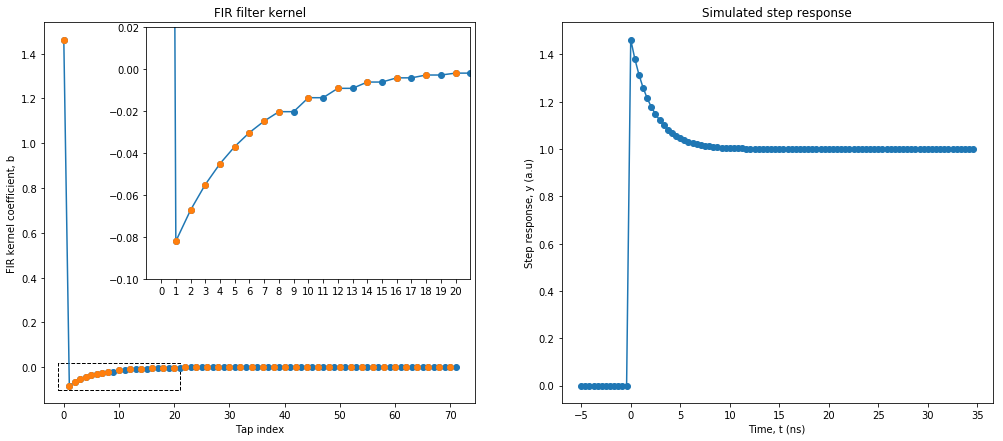

In [28]:
fir_coefs_taps = np.empty(40)

fir_coefs_taps[:8] = np.arange(8)
fir_coefs_taps[8:] = 8.0 + 2*np.arange(32)

zoom_region = np.array([[-1.0, -0.10], [21.0, 0.02]])

fig, (ax, ax2) = plt.subplots(1, 2, figsize=[17,7])
ax.set_title('FIR filter kernel')
ax.plot(fir_kernel, '-o')
ax.plot(fir_coefs_taps, fir_coefs, 'o')
ax.set_xlabel('Tap index')
ax.set_ylabel('FIR kernel coefficient, b')

rect = mpatches.Rectangle(zoom_region[0], np.diff(zoom_region[:, 0]), np.diff(zoom_region[:, 1]),  
                          facecolor = None, edgecolor = 'black', linestyle='--', fill=False)
ax.add_patch(rect)

axins = inset_axes(ax, width=4.5, height=3.5)
axins.plot(fir_kernel, '-o')
axins.plot(fir_coefs_taps, fir_coefs, 'o')
axins.set_xlim(zoom_region[:, 0])
axins.set_ylim(zoom_region[:, 1])
axins.set_xticks(np.arange(0, 21, 1))


ax2.set_title('Simulated step response')
ax2.plot(sim_time*1e9, sim_step_response, '-o')
ax2.set_xlabel('Time, t (ns)')
ax2.set_ylabel('Step response, y (a.u)')


#plt.ylim([-0.10, 0.02])
plt.show()

### Configure the FIR filter kernel to the device

In [29]:
AWG8.set('sigouts_{:d}_precompensation_fir_coefficients'.format(CHANNEL), fir_coefs)

Verify that the coefficients have been written correctly:

In [33]:
AWG8.sync()
device_coefs = AWG8.get('sigouts_{:d}_precompensation_fir_coefficients'.format(CHANNEL))

In [34]:
assert np.all(np.isclose(device_coefs, fir_coefs, atol=1.0/(2**15))), "ERROR: coefficient upload failed"

Enable the real-time FIR filter

In [35]:
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 1)

### Measuring the precompensated pulse

In order to measure a scope trace, connect : 

- AWG channel 0 to Signal in 0 on the UHFQC 
- AWG channel 1 to Trigger in on the UHFQC

Go to the LabOne user interface and configure the Triggering of the scope in 
`UHFQC/scope/Trig` and select Trigger enable, and set `Signal` to `Trigger in 1`. Note that these nodes are not available in the driver.



In [36]:
from pycqed.measurement.detector_functions import UHFQC_input_average_detector

C:\Users\yvess\Python\PycQED_py3\data
Data directory set to: C:\Users\yvess\Python\PycQED_py3\data


In [37]:
def measure_scope_trace(): 
    d = UHFQC_input_average_detector(UHFQC)
    d.prepare(sweep_points=None)
    values = d.get_values()
    return values[0]

In [38]:
AWG8.stop()
AWG8.start()

In [39]:
help(UHFQC.awg_sequence_acquisition_and_pulse_SSB)

Help on method awg_sequence_acquisition_and_pulse_SSB in module pycqed.instrument_drivers.physical_instruments.ZurichInstruments.UHFQuantumController:

awg_sequence_acquisition_and_pulse_SSB(f_RO_mod, RO_amp, RO_pulse_length, acquisition_delay, dig_trigger=True) method of pycqed.instrument_drivers.physical_instruments.ZurichInstruments.UHFQuantumController.UHFQC instance



In [40]:
UHFQC.awg_sequence_acquisition_and_pulse_SSB(0, 0, 100e-9, 0)

Configuring AWG of UHFQC_2109
Compilation started
Detected 1 devices with a total of 1 AWG cores.
Compiling string
Compilation successful
Uploading file to device dev2109, core 0
File successfully uploaded in 1.07s


In [41]:
CHANNEL

0

In [42]:
UHF_TRIGGER_LATENCY = 115e-9

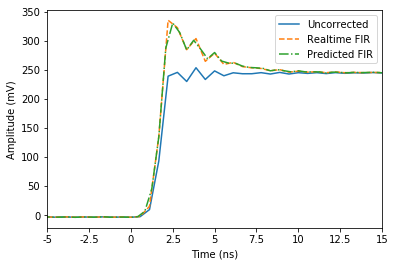

In [43]:

AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL_REF), 0)

from pycqed.analysis.tools.plotting import set_xlabel, set_ylabel
AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 0)
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 0)

values_ref=measure_scope_trace()
latency_ref = AWG8.get('sigouts_0_precompensation_latency')

AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 1)
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 1)

values_FIR=measure_scope_trace()
latency_FIR = AWG8.get('sigouts_0_precompensation_latency')

t_UHF=np.arange(len(values_ref))/1.8e9 - BUFFER + UHF_TRIGGER_LATENCY
t_HDAWG = np.arange(min(t_UHF), max(t_UHF), 1/2.4e9)

values_ref_HDAWG = np.interp(t_HDAWG, t_UHF, values_ref)
pred_response_HDAWG = signal.lfilter(fir_kernel, 1.0, values_ref_HDAWG)


f, ax=plt.subplots()
ax.plot(t_UHF - latency_ref, values_ref, label='Uncorrected')
ax.plot(t_UHF - latency_FIR, values_FIR, ls='--', label='Realtime FIR')
ax.plot(t_HDAWG - latency_ref, pred_response_HDAWG, ls='-.', label='Predicted FIR')
ax.legend()
set_ylabel(ax, 'Amplitude', 'V')
# ax.set_xlim(35e-9,55e-9)
# ax.set_xlim(0.0e-9, 100e-9)
ax.set_xlim(-5e-9, 15e-9)
set_xlabel(ax, 'Time', 's')

f.patch.set_alpha(0)
f.savefig('FIR_test.png', dpi=600)


#### Compare to offline precompensation

Configuring AWG_nr 0.
Compilation started
Detected 1 devices with a total of 1 AWG cores.
Compiling string
Compilation successful
Uploading file to device dev8052, core 0
File successfully uploaded in 2.05s


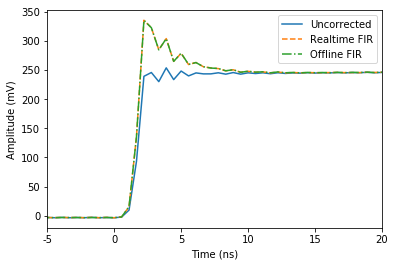

In [44]:
# Offline precompensation
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 0)
AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 0)

AWG8.stop()
w_pulses = np.concatenate((np.zeros(int(FS*BUFFER)), 
                           PULSE_AMP*np.ones(int(FS*PULSE_LENGTH)), 
                           PULSE_AMP*np.zeros(int(FS*PULSE_LENGTH)),
                           -PULSE_AMP*np.ones(int(FS*PULSE_LENGTH)),
                           PULSE_AMP*np.zeros(int(FS*PULSE_LENGTH))
                          ))
# w_ref = np.concatenate((PULSE_AMP*np.ones(2000), np.zeros(int(FS*BUFFER))))

# Apply precompensation offline
w_pulses_offlineFIR = signal.lfilter(fir_kernel, 1.0, w_pulses)

w0_name = "w_pulses_offlineFIR"
# w1_name = "w_pulses_ref"

AWG8._write_csv_waveform(w0_name, w_pulses_offlineFIR)

AWG8.configure_awg_from_string(0, '''
// Constants
const PULSE_AMP = {PULSE_AMP:};
const PULSE_LENGTH = {PULSE_LENGTH:};
const BUFFER = {BUFFER:}; 

// Waveform
wave w0 = "{DEV_NAME:}_{W0_NAME:}";
wave w1 = join(PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH), -PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH + BUFFER));

while (1) {{
    // Play waveform on channel 1
    setTrigger(1);
    setTrigger(0);
    playWave(w0, w1);
}}   
'''.format(PULSE_AMP = PULSE_AMP, 
           PULSE_LENGTH = int(FS*PULSE_LENGTH), 
           BUFFER = int(FS*BUFFER),
           DEV_NAME = AWG8._devname,
           W0_NAME = w0_name
          ))

AWG8.sync()
AWG8.start()
values_offlineFIR=measure_scope_trace()

f, ax=plt.subplots()
ax.plot(t_UHF - latency_ref, values_ref, label='Uncorrected')
ax.plot(t_UHF - latency_FIR, values_FIR, ls='--', label='Realtime FIR')
ax.plot(t_UHF - latency_ref, values_offlineFIR, ls='-.', label='Offline FIR')
ax.legend()
set_ylabel(ax, 'Amplitude', 'V')
# ax.set_xlim(35e-9,55e-9)
# ax.set_xlim(20e-9, 100e-9)
ax.set_xlim(-5e-9, 20e-9)
set_xlabel(ax, 'Time', 's')

f.patch.set_alpha(0)
f.savefig('FIR_test_direct_comp.png', dpi=600)

### Repeat for 20 ns Hanning waveform

In [62]:
FS = 2.4e9;
PULSE_AMP = 0.5;
PULSE_LENGTH = 20.0e-9;
BUFFER = 400e-9; 

AWG8.configure_awg_from_string(0, '''
// Constants
const PULSE_AMP = {PULSE_AMP:};
const PULSE_LENGTH = {PULSE_LENGTH:};
const BUFFER = {BUFFER:}; 

// Waveform
wave w0 = join(zeros(BUFFER), PULSE_AMP*hann(PULSE_LENGTH), zeros(PULSE_LENGTH), -PULSE_AMP*hann(PULSE_LENGTH), zeros(PULSE_LENGTH));
wave w1 = join(PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH), -PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH + BUFFER));

while (1) {{
    // Play waveform on channel 1
    setTrigger(1);
    setTrigger(0);
    playWave(w0, w1);
}}   
'''.format(PULSE_AMP = PULSE_AMP, PULSE_LENGTH = int(FS*PULSE_LENGTH), BUFFER = int(FS*BUFFER)))
AWG8.start()

Configuring AWG_nr 0.
Compilation started
Detected 1 devices with a total of 1 AWG cores.
Compiling string
Compilation successful
Uploading file to device dev8052, core 0
File successfully uploaded in 1.17s


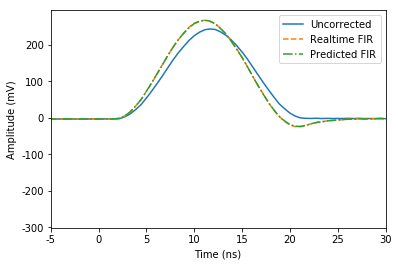

In [63]:

AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL_REF), 0)

from pycqed.analysis.tools.plotting import set_xlabel, set_ylabel
AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 0)
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 0)

values_ref=measure_scope_trace()
latency_ref = AWG8.get('sigouts_0_precompensation_latency')

AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 1)
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 1)

values_FIR=measure_scope_trace()
latency_FIR = AWG8.get('sigouts_0_precompensation_latency')

values_ref_HDAWG = np.interp(t_HDAWG, t_UHF, values_ref)
pred_response_HDAWG = signal.lfilter(fir_kernel, 1.0, values_ref_HDAWG)

t=np.arange(len(values_ref))/1.8e9 - BUFFER + UHF_TRIGGER_LATENCY
f, ax=plt.subplots()
ax.plot(t_UHF - latency_ref, values_ref, label='Uncorrected')
ax.plot(t_UHF - latency_FIR, values_FIR, ls='--', label='Realtime FIR')
ax.plot(t_HDAWG - latency_ref, pred_response_HDAWG, ls='-.', label='Predicted FIR')
ax.legend()
set_ylabel(ax, 'Amplitude', 'V')
# ax.set_xlim(35e-9,55e-9)
# ax.set_xlim(0.0e-9, 100e-9)
ax.set_xlim(-5e-9, 30e-9)
set_xlabel(ax, 'Time', 's')

f.patch.set_alpha(0)
f.savefig('FIR_test_hann.png', dpi=600)


#### Compare to offline precompensation

Configuring AWG_nr 0.
Compilation started
Detected 1 devices with a total of 1 AWG cores.
Compiling string
Compilation successful
Uploading file to device dev8052, core 0
File successfully uploaded in 1.17s


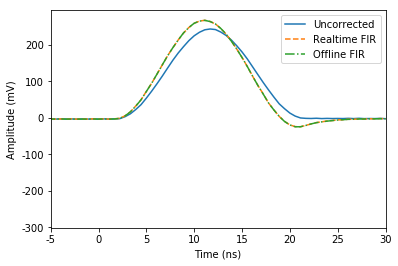

In [65]:

# Offline precompensation
AWG8.set('sigouts_{:d}_precompensation_fir_enable'.format(CHANNEL), 0)
AWG8.set('sigouts_{:d}_precompensation_enable'.format(CHANNEL), 0)

AWG8.stop()
w_pulses = np.concatenate((np.zeros(int(FS*BUFFER)), 
                           PULSE_AMP*signal.windows.hann(int(FS*PULSE_LENGTH)), 
                           PULSE_AMP*np.zeros(int(FS*PULSE_LENGTH)),
                           -PULSE_AMP*signal.windows.hann(int(FS*PULSE_LENGTH)),
                           PULSE_AMP*np.zeros(int(FS*PULSE_LENGTH))
                          ))
# w_ref = np.concatenate((PULSE_AMP*np.ones(2000), np.zeros(int(FS*BUFFER))))

# Apply precompensation offline
w_pulses_offlineFIR = signal.lfilter(fir_kernel, 1.0, w_pulses)

w0_name = "w_pulses_offlineFIR"
# w1_name = "w_pulses_ref"

AWG8._write_csv_waveform(w0_name, w_pulses_offlineFIR)

AWG8.configure_awg_from_string(0, '''
// Constants
const PULSE_AMP = {PULSE_AMP:};
const PULSE_LENGTH = {PULSE_LENGTH:};
const BUFFER = {BUFFER:}; 

// Waveform
wave w0 = "{DEV_NAME:}_{W0_NAME:}";
wave w1 = join(PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH), -PULSE_AMP*ones(PULSE_LENGTH), zeros(PULSE_LENGTH + BUFFER));

while (1) {{
    // Play waveform on channel 1
    setTrigger(1);
    setTrigger(0);
    playWave(w0, w1);
}}   
'''.format(PULSE_AMP = PULSE_AMP, 
           PULSE_LENGTH = int(FS*PULSE_LENGTH), 
           BUFFER = int(FS*BUFFER),
           DEV_NAME = AWG8._devname,
           W0_NAME = w0_name
          ))

AWG8.sync()
AWG8.start()
values_offlineFIR=measure_scope_trace()

f, ax=plt.subplots()
ax.plot(t_UHF - latency_ref, values_ref, label='Uncorrected')
ax.plot(t_UHF - latency_FIR, values_FIR, ls='--', label='Realtime FIR')
ax.plot(t_UHF - latency_ref, values_offlineFIR, ls='-.', label='Offline FIR')
ax.legend()
set_ylabel(ax, 'Amplitude', 'V')
# ax.set_xlim(35e-9,55e-9)
# ax.set_xlim(20e-9, 100e-9)
ax.set_xlim(-5e-9, 30e-9)
set_xlabel(ax, 'Time', 's')

f.patch.set_alpha(0)
f.savefig('FIR_test_direct_comp_hann.png', dpi=600)

## Bounce correction

In [31]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_delay'.format(CHANNEL), 11.1e-9)

In [32]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_amplitude'.format(CHANNEL), 0.286)

In [33]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_enable'.format(CHANNEL), 1)

Disable the bounce correction again:

In [34]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_enable'.format(CHANNEL), 0)

### Load measured bounce

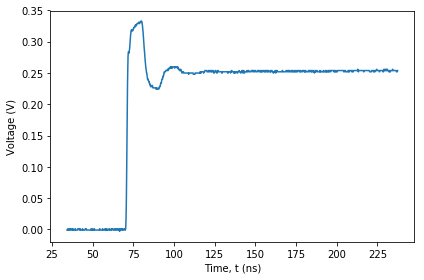

In [36]:
data = np.loadtxt('RefCurve_2018-07-05_0_125749.Wfm.csv', delimiter=';')
plt.plot(data[:,0]*1e9, data[:,1])
plt.xlabel('Time, t (ns)')
plt.ylabel('Voltage (V)')
plt.tight_layout()

plt.show()

Determine scope sample rate:

In [37]:
scope_sample_rate = 1/(data[1,0]-data[0,0])

Define ideal step response

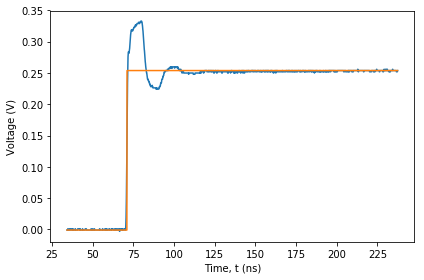

In [38]:
threshold = 0.15
step_response = data[0,1]*np.ones(len(data))
step_response[data[:,1] > threshold] = data[-1,1]

plt.plot(data[:,0]*1e9, data[:,1])
plt.plot(data[:,0]*1e9, step_response)
plt.xlabel('Time, t (ns)')
plt.ylabel('Voltage (V)')
plt.tight_layout()

plt.show()

Fit correction:

In [39]:
bnds = ((0.4e-9, 103e-9), (-1, 1))

In [40]:
bnds[0][1]

1.03e-07

In [41]:
def objective_func(params):
    pred_corr = first_order_bounce_corr(data[:,1], min(max(params[0], bnds[0][0]), bnds[0][1]), params[1], 2.4e9, scope_sample_rate)
    step_response = pred_corr[0]*np.ones(len(pred_corr))
    step_response[pred_corr > threshold] = pred_corr[-1]
    penalty = 0 if bnds[0][0] < params[0] < bnds[0][1] else 10
    return np.mean(np.abs(pred_corr-step_response)) + penalty

In [42]:
opt = minimize(objective_func, (10e-9, 0.3), method='Nelder-Mead')

In [43]:
opt

 final_simplex: (array([[1.11250000e-08, 2.75625000e-01],
       [1.11545410e-08, 2.75570068e-01],
       [1.11675415e-08, 2.75669861e-01]]), array([0.00260051, 0.00260052, 0.00260052]))
           fun: 0.0026005126780546265
       message: 'Optimization terminated successfully.'
          nfev: 36
           nit: 18
        status: 0
       success: True
             x: array([1.11250e-08, 2.75625e-01])

In [44]:
pred_corr = first_order_bounce_corr(data[:,1], opt.x[0], opt.x[1], 2.4e9, scope_sample_rate, sim_hw_delay = True)
step_response = pred_corr[0]*np.ones(len(pred_corr))
step_response[pred_corr > threshold] = pred_corr[-1]

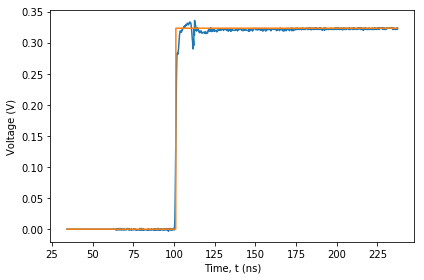

In [45]:
plt.plot(data[:,0]*1e9, pred_corr)
plt.plot(data[:,0]*1e9, step_response)
plt.xlabel('Time, t (ns)')
plt.ylabel('Voltage (V)')
plt.tight_layout()

plt.show()

### Run real-time pre-distortion with optimized coefficients

In [46]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_delay'.format(CHANNEL), opt.x[0])

In [47]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_amplitude'.format(CHANNEL), opt.x[1])

In [48]:
AWG8.set('sigouts_{:d}_precompensation_bounces_0_enable'.format(CHANNEL), 0)

### Load measured correction and compare

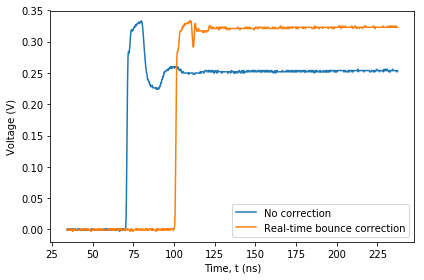

In [49]:
data_corr = np.loadtxt('RefCurve_2018-07-05_1_130234.Wfm.csv', delimiter=';')
plt.plot(data[:,0]*1e9, data[:,1], label='No correction')
plt.plot(data[:,0]*1e9, data_corr[:,1], label='Real-time bounce correction')
plt.xlabel('Time, t (ns)')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.legend()
plt.savefig('bounce_correction_measurements.png',dpi=600,bbox_inches='tight')
plt.show()

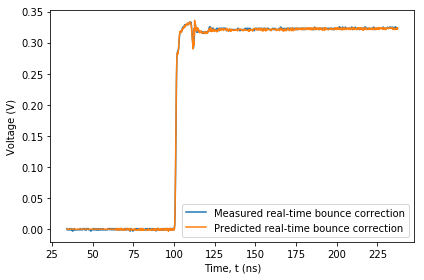

In [50]:
data_corr = np.loadtxt('RefCurve_2018-07-05_1_130234.Wfm.csv', delimiter=';')
#plt.plot(data[:,0]*1e9, data[:,1], label='No correction')
plt.plot(data[:,0]*1e9, data_corr[:,1], label='Measured real-time bounce correction')
plt.plot(data[:,0]*1e9, pred_corr, label='Predicted real-time bounce correction')
plt.xlabel('Time, t (ns)')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.legend()
plt.savefig('bounce_correction_measurement_vs_prediction.png',dpi=600,bbox_inches='tight')
plt.show()

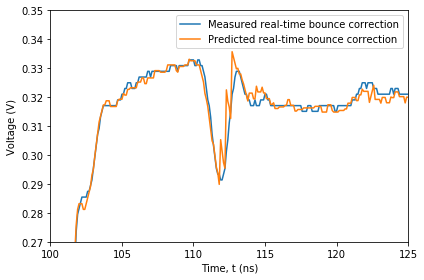

In [51]:
data_corr = np.loadtxt('RefCurve_2018-07-05_1_130234.Wfm.csv', delimiter=';')
#plt.plot(data[:,0]*1e9, data[:,1], label='No correction')
plt.plot(data[:,0]*1e9, data_corr[:,1], label='Measured real-time bounce correction')
plt.plot(data[:,0]*1e9, pred_corr, label='Predicted real-time bounce correction')
plt.xlabel('Time, t (ns)')
plt.ylabel('Voltage (V)')
plt.xlim([100, 125])
plt.ylim([0.27, 0.35])
plt.tight_layout()
plt.legend()
plt.savefig('bounce_correction_measurement_vs_prediction_zoom.png',dpi=600,bbox_inches='tight')
plt.show()